# Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

import numpy as np

import seaborn as sns

import csv

# Reading Data Set using Pandas

In [2]:
data = pd.read_csv('Demographic_Data.csv')

# Preliminary Analysis and Data Cleaning

In [3]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919701,2.675000
std,0.500003,15.715679,2.061238,721.273702,1.126672
min,0.000000,18.000000,1.000000,5.000000,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
data = data.drop_duplicates()
data.describe()

,in-store,age,items,amount,region
count,79976.000000,79976.000000,79976.000000,79976.000000,79976.000000
mean,0.500025,45.757990,4.505089,835.854327,2.674940
std,0.500003,15.714653,2.061268,721.262053,1.126655
min,0.000000,18.000000,1.000000,5.000000,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,1.000000,45.000000,4.000000,582.240000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [7]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [8]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [9]:
data.shape

(79976, 5)

In [10]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


## Breaking Down the Data by Region

In [11]:
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
df_new = data[['age', 'amount', 'region', 'in-store']]
df_new.head()

,age,amount,region,in-store
0,37,281.03,2,0
1,35,219.51,2,0
2,45,"1,525.70",4,1
3,46,715.25,3,1
4,33,"1,937.50",1,1


In [13]:
df_new.dtypes

age           int64
amount      float64
region        int64
in-store      int64
dtype: object

In [14]:
df_temp = df_new.iloc[:,0:4]
df_temp['in-store'] = df_new['in-store'].astype('str')
df_temp['region'] = df_new['region'].astype('str')

In [15]:
mapping = {'region': 'sales', 'in-store': 'sales'}
  
df_sales = df_temp.groupby(mapping, axis = 1).sum()
  
df_sales.head()

,sales
0,20
1,20
2,41
3,31
4,11


In [16]:
df_sales['sales'] = df_sales['sales'].astype('category')

In [17]:
df_sales.dtypes

sales    category
dtype: object

In [18]:
# Yield new dataframe with collapsed column consisting of 'region' and 'in-store'
dataX = pd.concat([df_new,df_sales], axis=1)
dataX.head()

,age,amount,region,in-store,sales
0,37,281.03,2,0,20
1,35,219.51,2,0,20
2,45,"1,525.70",4,1,41
3,46,715.25,3,1,31
4,33,"1,937.50",1,1,11


In [19]:
dataX['sales'].value_counts(sort=False)

11    15997
20    19991
30     7001
31    10999
40    12994
41    12994
Name: sales, dtype: int64

In [20]:
# New Regions
# 10 = North Online
# 11 = North In-store
# 20 = South Online
# 21 = South In-store
# 30 = East Online
# 31 = East In-store
# 40 = West Online
# 41 = West In-store

In [21]:
dataX.dtypes

age            int64
amount       float64
region         int64
in-store       int64
sales       category
dtype: object

In [22]:
dataX['sales'] = dataX['sales'].astype('int64')

In [23]:
dataX.dtypes

age           int64
amount      float64
region        int64
in-store      int64
sales         int64
dtype: object

In [24]:
cols = ['in-store', 'age', 'items', 'amount']

### North

In [25]:
north = data[data.region == 1]
north = north[cols]
north.index.name = "index_data"
north.reset_index(drop = True).head()

,in-store,age,items,amount
0,1,33,4,"1,937.50"
1,1,51,5,908.31
2,1,47,3,767.54
3,1,33,2,684.32
4,1,20,7,"1,901.30"


In [26]:
# Checking average purchase price of customers 24 and under in North region
n_24under = north.loc[north['age'] <= 24, ['age','amount']]
n_24under.describe()

,age,amount
count,"1,107.00","1,107.00"
mean,21.81,996.30
std,1.67,563.27
min,19.00,50.55
25%,20.00,511.42
50%,22.00,990.52
75%,23.00,"1,491.35"
max,24.00,"1,997.70"


In [27]:
# Checking average purchase price of customers 56 and over in North region
n_56over = north.loc[north['age'] >= 56, ['age','amount']]
n_56over.describe()

,age,amount
count,"3,307.00","3,307.00"
mean,64.71,520.99
std,5.32,272.59
min,56.00,50.05
25%,60.00,289.46
50%,65.00,520.41
75%,69.00,752.88
max,74.00,999.70


### South

In [28]:
south = data[data.region == 2]
south = south[cols]
south.index.name = "index_data"
south.reset_index(drop = True).head()

,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,0,43,6,8.55
3,0,32,2,59.00
4,0,42,5,114.49


### East

In [29]:
east = data[data.region == 3]
east = east[cols]
east.index.name = "index_data"
east.reset_index(drop = True).head()

,in-store,age,items,amount
0,1,46,3,715.25
1,1,66,5,819.98
2,1,44,5,122.39
3,1,48,7,529.57
4,0,43,7,"1,585.10"


In [30]:
# Checking average purchase price of customers 23 and under in East region
e_23under = east.loc[east['age'] <= 23, ['age','amount']]
e_23under.describe()

,age,amount
count,861.00,861.00
mean,20.69,"1,578.27"
std,1.60,835.45
min,18.00,100.63
25%,19.00,837.22
50%,21.00,"1,603.70"
75%,22.00,"2,311.70"
max,23.00,"3,000.00"


In [31]:
# Checking average purchase price of customers 64 and over in East region
e_64over = east.loc[east['age'] >= 64, ['age','amount']]
e_64over.describe()

,age,amount
count,"2,241.00","2,241.00"
mean,68.84,513.03
std,3.03,272.14
min,64.00,50.13
25%,66.00,279.96
50%,69.00,510.40
75%,71.00,746.41
max,74.00,999.63


In [32]:
# Checking average online purchase amount in East region
e_ol = east.loc[east['in-store'] == 0, ['age', 'amount']]
e_ol.describe()

,age,amount
count,"7,001.00","7,001.00"
mean,40.48,"1,541.71"
std,13.00,835.02
min,18.00,100.23
25%,30.00,814.09
50%,40.00,"1,547.30"
75%,52.00,"2,256.40"
max,63.00,"3,000.00"


In [33]:
# Checking average in store purchase amount in East region
e_is = east.loc[east['in-store'] == 1, ['age', 'amount']]
e_is.describe()

,age,amount
count,"10,999.00","10,999.00"
mean,48.94,520.95
std,14.31,273.75
min,24.00,50.13
25%,37.00,284.81
50%,49.00,517.94
75%,61.00,757.41
max,74.00,999.81


### West

In [34]:
west = data[data.region == 4]
west = west[cols]
west.index.name = "index_data"
west.reset_index(drop = True).head()

,in-store,age,items,amount
0,1,45,3,"1,525.70"
1,0,24,3,"1,314.20"
2,1,34,6,270.49
3,0,35,2,"2,791.60"
4,0,58,7,"1,225.80"


In [35]:
# Checking average purchase price of customers 56 and over in West region
w_56over = west.loc[west['age'] >= 56, ['age','amount']]
w_56over.describe()

,age,amount
count,"2,158.00","2,158.00"
mean,59.26,"1,545.11"
std,2.16,842.57
min,56.00,101.03
25%,57.00,803.05
50%,59.00,"1,543.45"
75%,61.00,"2,280.25"
max,63.00,"2,999.70"


In [36]:
# Checking average purchase price of customers 19-55 in West region
w_19under55 = west.loc[west['age'] < 56, ['age','amount', 'in-store']]
w_19under55 = w_19under55.loc[w_19under55['age'] > 18, ['age', 'amount', 'in-store']]
w_19under55.describe()

,age,amount,in-store
count,"23,684.00","23,684.00","23,684.00"
mean,37.01,"1,259.37",0.55
std,10.52,743.08,0.50
min,19.00,50.60,0.00
25%,28.00,646.02,0.00
50%,37.00,"1,208.95",1.00
75%,46.00,"1,778.33",1.00
max,55.00,"3,000.00",1.00


In [37]:
w_rem_ol = w_19under55.loc[w_19under55['in-store'] == 0, ['age', 'amount']]
w_rem_ol.describe()

,age,amount
count,"10,690.00","10,690.00"
mean,37.05,"1,545.17"
std,10.64,832.27
min,19.00,100.27
25%,28.00,828.54
50%,37.00,"1,540.25"
75%,46.00,"2,256.10"
max,55.00,"3,000.00"


In [38]:
w_rem_is = w_19under55.loc[w_19under55['in-store'] == 1, ['age', 'amount']]
w_rem_is.describe()

,age,amount
count,"12,994.00","12,994.00"
mean,36.98,"1,024.24"
std,10.41,560.46
min,19.00,50.60
25%,28.00,546.67
50%,37.00,"1,015.80"
75%,46.00,"1,510.15"
max,55.00,"1,999.90"


In [39]:
# Checking average online purchase amount in West region
w_ol = west.loc[west['in-store'] == 0, ['age', 'amount']]
w_ol.describe()

,age,amount
count,"12,994.00","12,994.00"
mean,40.52,"1,543.64"
std,12.96,833.68
min,18.00,100.27
25%,29.00,821.91
50%,40.00,"1,539.15"
75%,52.00,"2,256.57"
max,63.00,"3,000.00"


In [40]:
# Checking average in store purchase amount in West region
w_is = west.loc[west['in-store'] == 1, ['age', 'amount']]
w_is.describe()

,age,amount
count,"12,994.00","12,994.00"
mean,36.98,"1,024.24"
std,10.41,560.46
min,19.00,50.60
25%,28.00,546.67
50%,37.00,"1,015.80"
75%,46.00,"1,510.15"
max,55.00,"1,999.90"


In [41]:
data['region_name'] = data['region']

In [42]:
data['region_name'].mask(data['region'] == 1, 'North', inplace=True)
data['region_name'].mask(data['region'] == 2, 'South', inplace=True)
data['region_name'].mask(data['region'] == 3, 'East', inplace=True)
data['region_name'].mask(data['region'] == 4, 'West', inplace=True)
data['region_name'].value_counts()

West     25988
South    19991
East     18000
North    15997
Name: region_name, dtype: int64

In [43]:
pt_mean = data.pivot_table(index = 'items', columns = 'region_name', values = 'amount', aggfunc = ['mean'])
print("Average Amount Spent on \"X\" Number of Items by Region")
pt_mean

Average Amount Spent on "X" Number of Items by Region


mean                       
region_name   East  North  South     West
items                                    
1           894.24 751.45 257.59 1,255.78
2           931.77 766.92 250.01 1,297.20
3           916.42 743.81 252.18 1,272.76
4           935.01 727.30 249.63 1,280.25
5           911.58 745.74 252.52 1,277.75
6           903.04 740.03 254.96 1,296.39
7           910.42 737.79 251.80 1,280.24
8           937.91 757.54 249.88 1,310.65

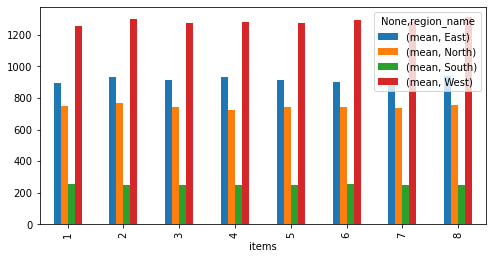

In [44]:
pt_mean.plot(kind='bar', figsize=(8, 4))
plt.show()

An attempt to answer the question "Is there a relationship between the number of `items` purchased and `amount` spent?" by `region`. This would suggest that, no, there isn't really, but I'm not certain this tells the whole story.

In [45]:
pt_median = data.pivot_table(index='items', columns='region_name', values='amount', aggfunc=['median'])
print("Median Amount Spent on \"X\" Number of Items by Region")
pt_median

Median Amount Spent on "X" Number of Items by Region


median                       
region_name   East  North  South     West
items                                    
1           683.72 662.86 261.69 1,171.60
2           703.26 689.21 244.69 1,250.00
3           691.97 655.17 254.05 1,230.40
4           728.97 642.40 246.13 1,221.25
5           706.83 680.96 249.07 1,219.30
6           669.35 653.02 253.18 1,250.95
7           700.39 658.44 253.76 1,220.10
8           705.47 669.84 241.69 1,276.20

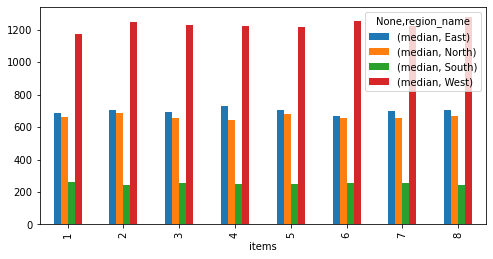

In [46]:
pt_median.plot(kind='bar', figsize=(8, 4))
plt.show()

Another attempt to look at correlation between `amount` spent and number of `items` purchased by examining median values of `amount` spent. Again, there is an indication of an oddly consistent dollar amount being spent regardless of total number of items within each `region` but that range changes depending on the `region`.

In [47]:
pt_online = data.pivot_table(index = 'in-store', columns = 'region_name', values = 'amount', aggfunc = ['mean'])
print("Average Amount Spent Online vs In Store by Region")
pt_online

Average Amount Spent Online vs In Store by Region


mean                       
region_name     East  North  South     West
in-store                                   
0           1,541.71    NaN 252.12 1,543.64
1             520.95 744.99    NaN 1,024.24

In [48]:
pt_online = data.pivot_table(index = 'in-store', columns = 'region_name', values = 'amount', aggfunc = ['sum'])
print("Total Amount Spent Online vs In Store by Region")
pt_online

Total Amount Spent Online vs In Store by Region


sum                                         
region_name          East         North        South          West
in-store                                                          
0           10,793,540.39           NaN 5,040,221.29 20,058,007.38
1            5,729,913.33 11,917,620.50          NaN 13,308,982.78

In [49]:
data['age_gen'] = pd.cut(x=data['age'], bins=[18,25,41,57,76,85], labels=False, include_lowest=True)
data.head()

,in-store,age,items,amount,region,region_name,age_gen
0,0,37,4,281.03,2,South,1
1,0,35,2,219.51,2,South,1
2,1,45,3,"1,525.70",4,West,2
3,1,46,3,715.25,3,East,2
4,1,33,4,"1,937.50",1,North,1


In [50]:
data['generation'] = data['age_gen']

In [51]:
data['generation'].mask(data['age_gen'] == 0, 'Gen Z', inplace=True)
data['generation'].mask(data['age_gen'] == 1, 'Millenial', inplace=True)
data['generation'].mask(data['age_gen'] == 2, 'Gen X', inplace=True)
data['generation'].mask(data['age_gen'] == 3, 'Baby Boomer', inplace=True)
data['generation'].mask(data['age_gen'] == 4, 'Silent Gen', inplace=True)
data['generation'].value_counts()

Millenial      27133
Gen X          26683
Baby Boomer    15566
Gen Z           7505
Silent Gen      3089
Name: generation, dtype: int64

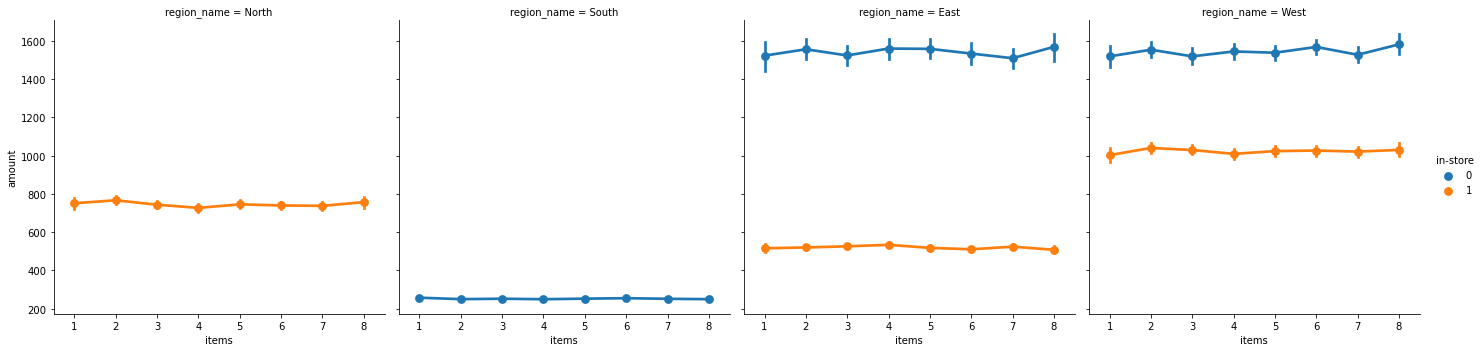

In [52]:
sns.catplot(kind='point', x='items', y='amount', data=data, hue='in-store', 
               hue_order=[0, 1], col='region_name', col_order=['North', 'South', 'East', 'West'])
plt.show()

When I plot `items` against `amount` and break it down by `region` and `in-store`, we can start to see the correlation between online sales and purchase amount. However, in the South, where all sales were online we see the lowest sales totals. I posit that there must be an unseen demographic factor at work here. Perhaps we should be taking into account income levels in the different regions.

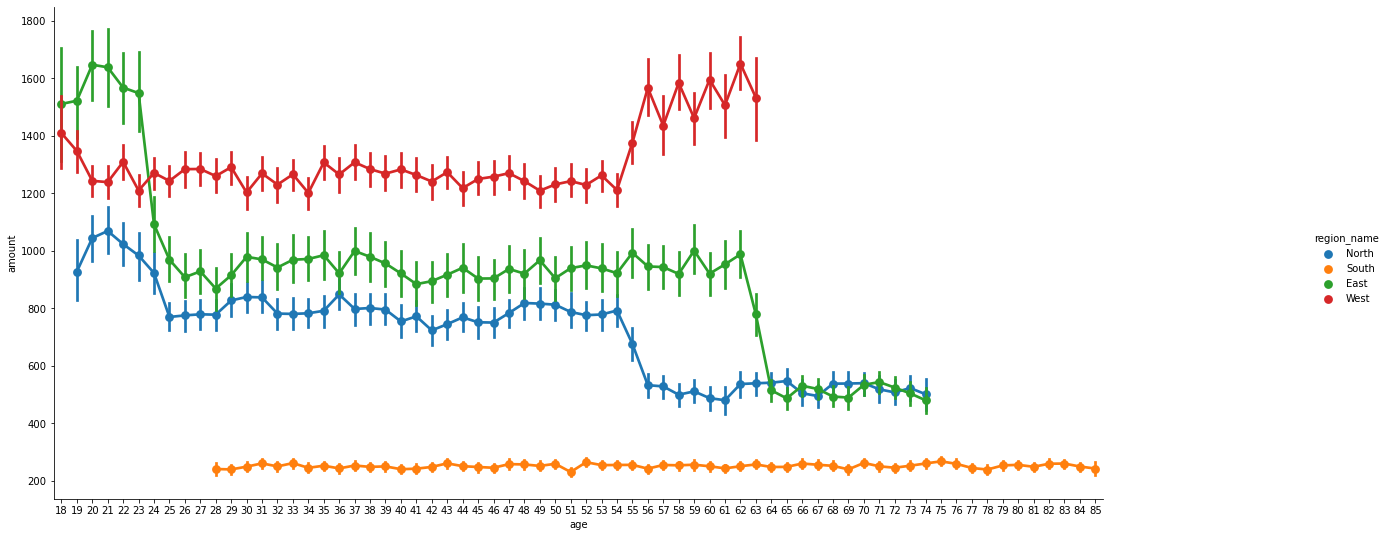

In [53]:
ag_am =sns.catplot(kind='point', x='age', y='amount', data=data, hue='region_name', 
                    hue_order=['North', 'South', 'East', 'West'])
ag_am.fig.set_figwidth(22)
ag_am.fig.set_figheight(8)
plt.show()

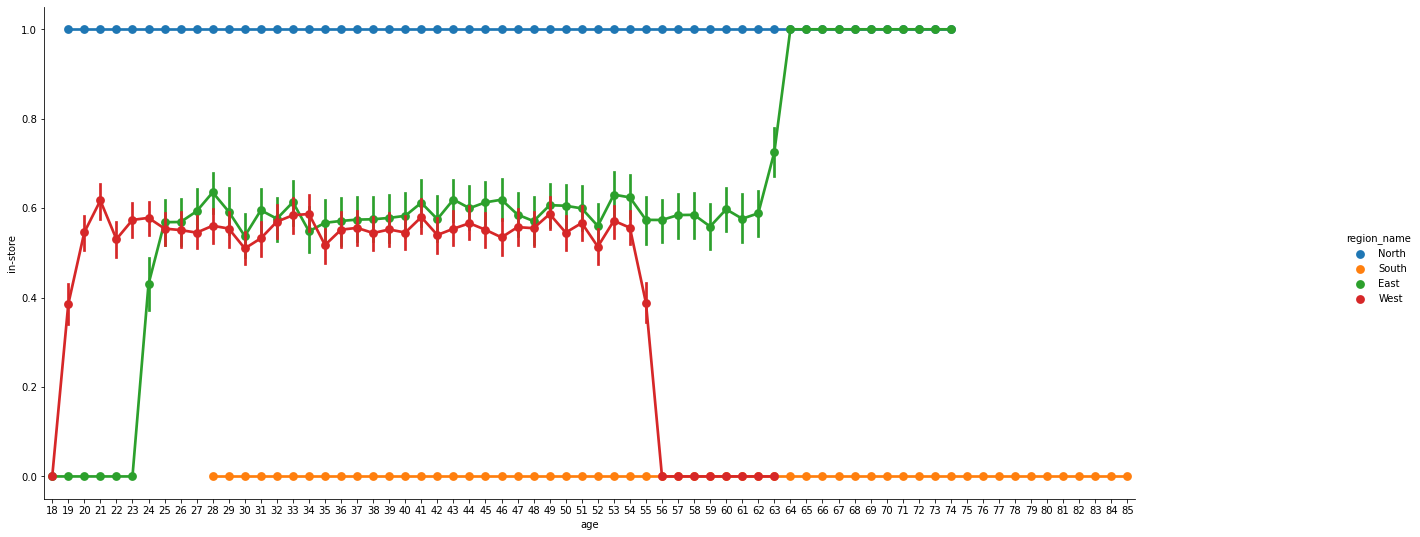

In [54]:
ag_is = sns.catplot(kind='point', x='age', y='in-store', data=data, hue='region_name', 
                    hue_order=['North', 'South', 'East', 'West'])
ag_is.fig.set_figwidth(22)
ag_is.fig.set_figheight(8)
plt.show()

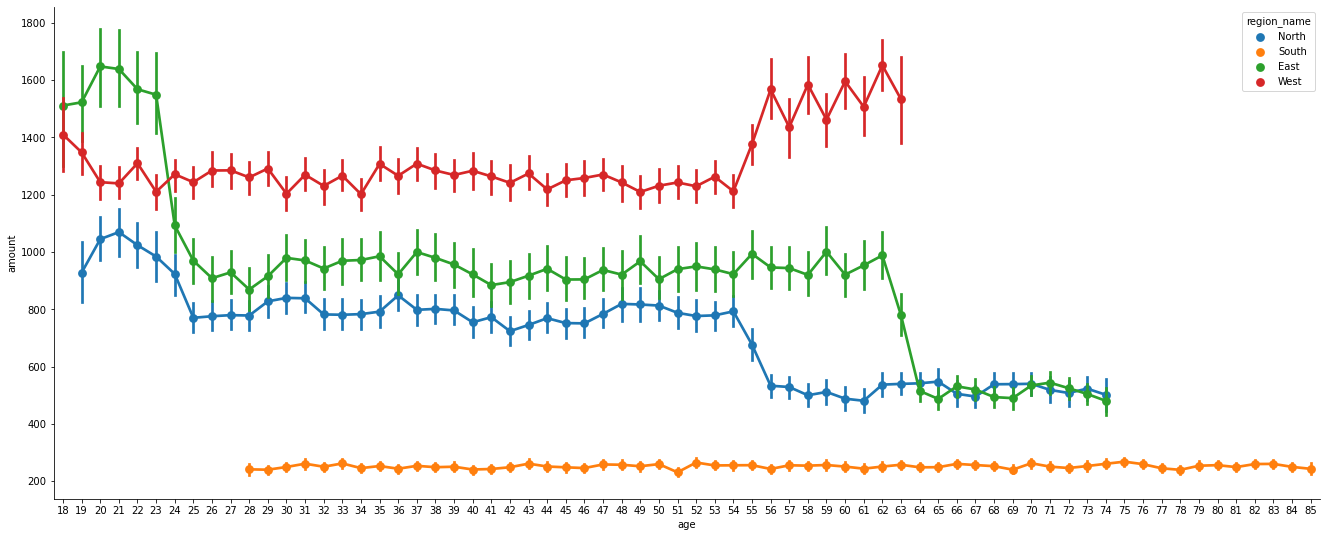

In [55]:
ag_am1 =sns.catplot(kind='point', x='age', y='amount', data=data, hue='region_name', 
                    hue_order=['North', 'South', 'East', 'West'], legend_out=False)
ag_am1.fig.set_figwidth(22)
ag_am1.fig.set_figheight(8)
plt.show()

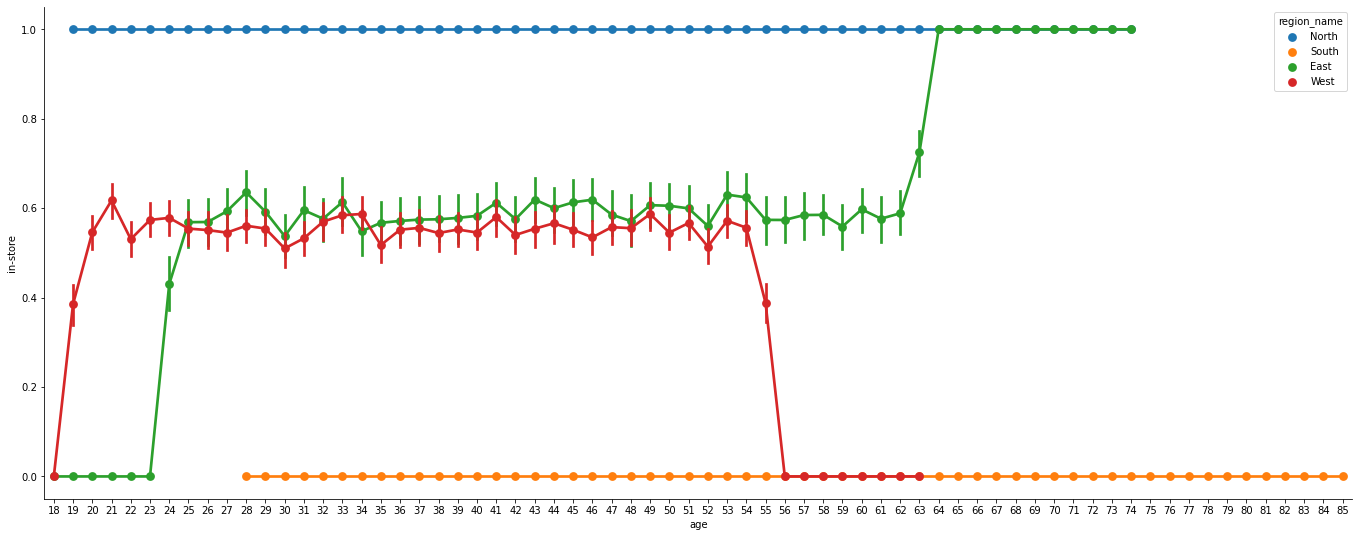

In [56]:
pres1 = sns.catplot(kind='point', x='age', y='in-store', data=data, hue='region_name', 
                    hue_order=['North', 'South', 'East', 'West'], legend_out=False)
pres1.fig.set_figwidth(22)
pres1.fig.set_figheight(8)
plt.show()

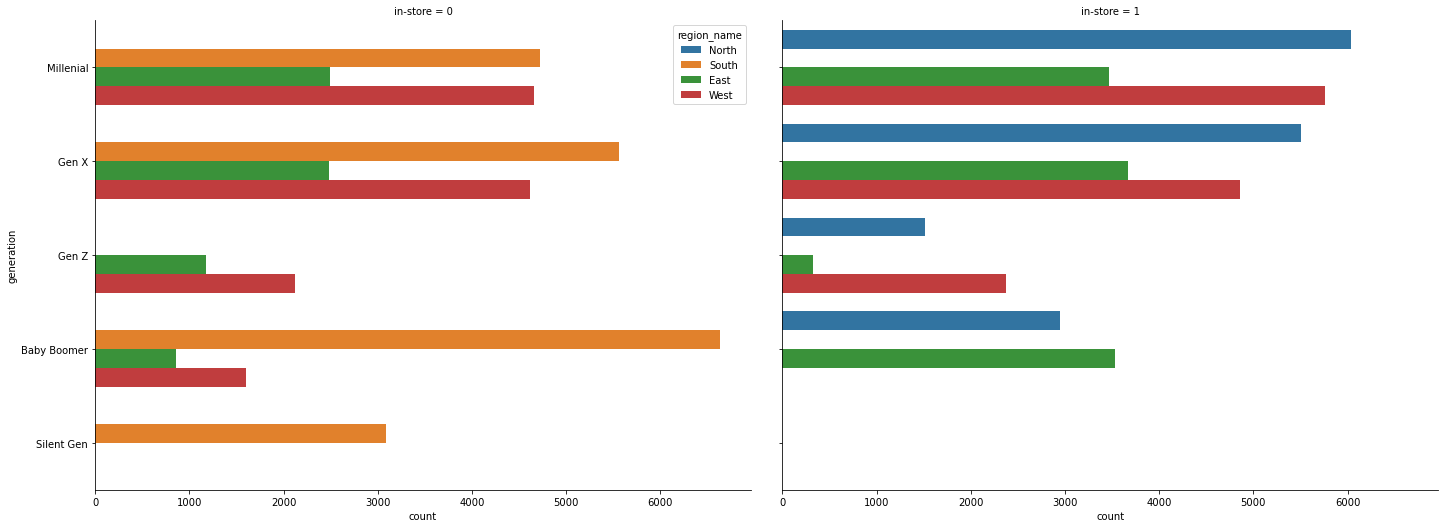

In [57]:
pres2 = sns.catplot(kind='count', x=None, y='generation', col='in-store', data=data, hue='region_name', 
                    hue_order=['North', 'South', 'East', 'West'], legend_out=False)
pres2.fig.set_figwidth(22)
pres2.fig.set_figheight(8)
plt.show()

In [58]:
data['Purchase Method'] = data['in-store']

In [59]:
data['Purchase Method'].mask(data['in-store'] == 0, 'Online', inplace=True)
data['Purchase Method'].mask(data['in-store'] == 1, 'In Store', inplace=True)
data['Purchase Method'].value_counts()

In Store    39990
Online      39986
Name: Purchase Method, dtype: int64

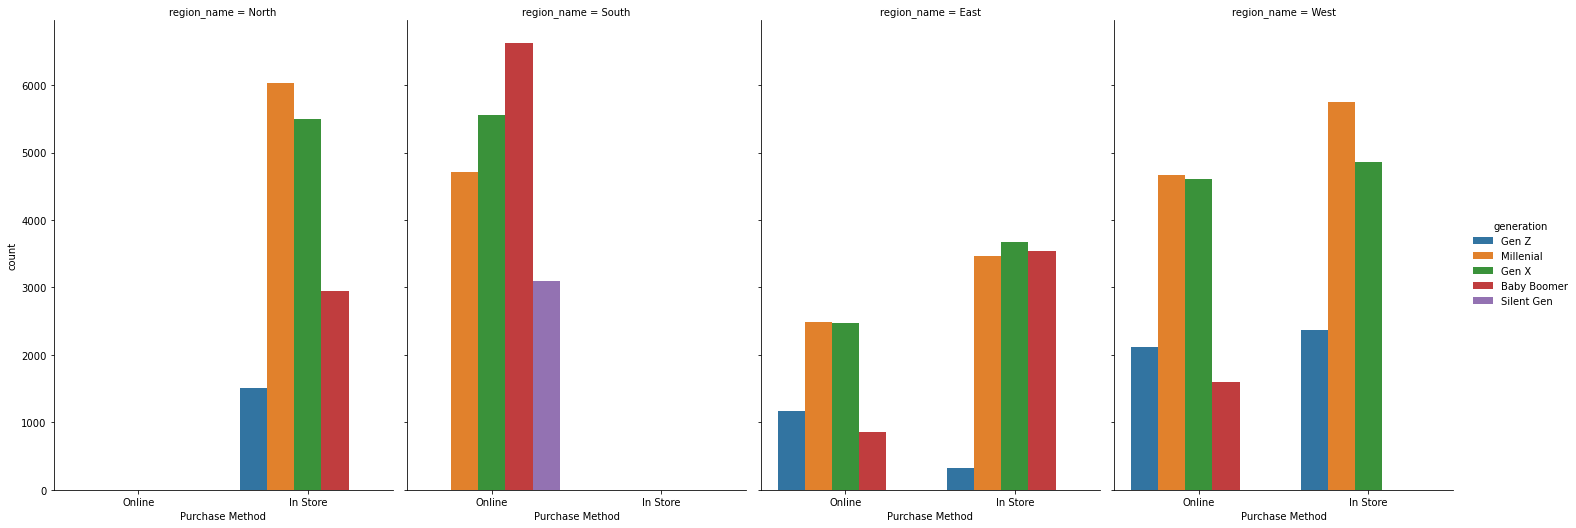

In [60]:
pres3 = sns.catplot(kind='count', x='Purchase Method', y=None, col='region_name', data=data, hue='generation', 
                    col_order=['North', 'South', 'East', 'West'],
                    hue_order=['Gen Z', 'Millenial', 'Gen X', 'Baby Boomer', 'Silent Gen'], legend_out=True)
pres3.fig.set_figwidth(22)
pres3.fig.set_figheight(8)
plt.show()

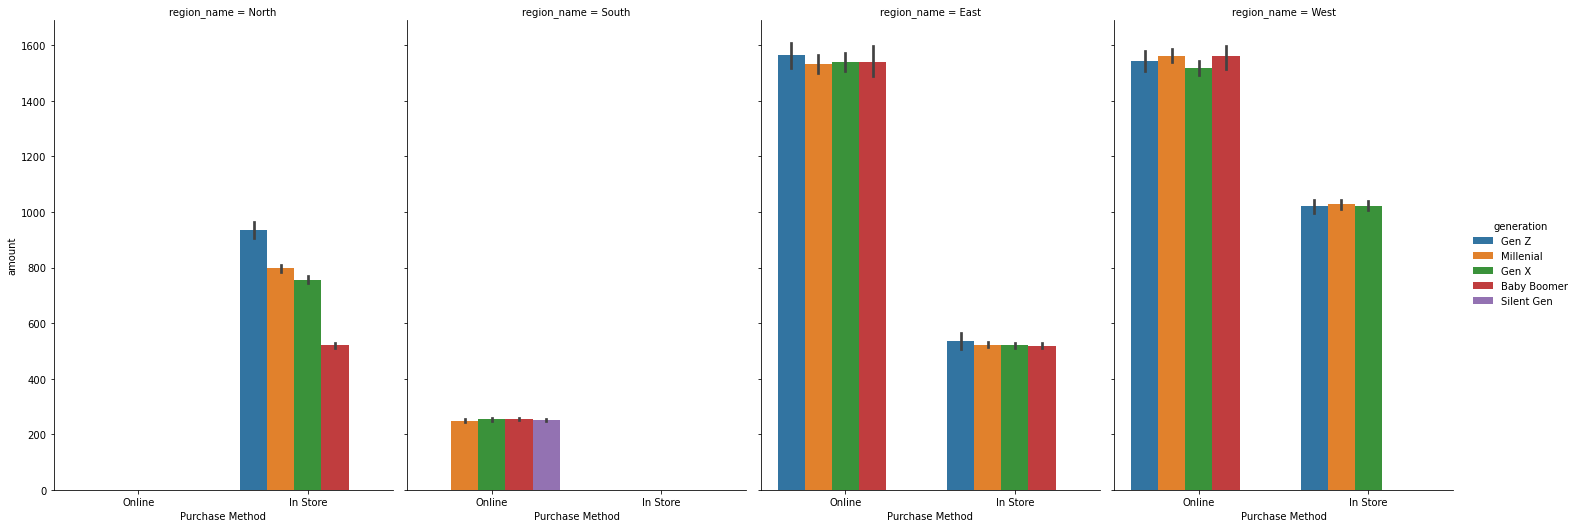

In [61]:
pres4 = sns.catplot(kind='bar', x='Purchase Method', y='amount', col='region_name', data=data, hue='generation', 
                    col_order=['North', 'South', 'East', 'West'],
                    hue_order=['Gen Z', 'Millenial', 'Gen X', 'Baby Boomer', 'Silent Gen'], legend_out=True)
pres4.fig.set_figwidth(22)
pres4.fig.set_figheight(8)
plt.show()

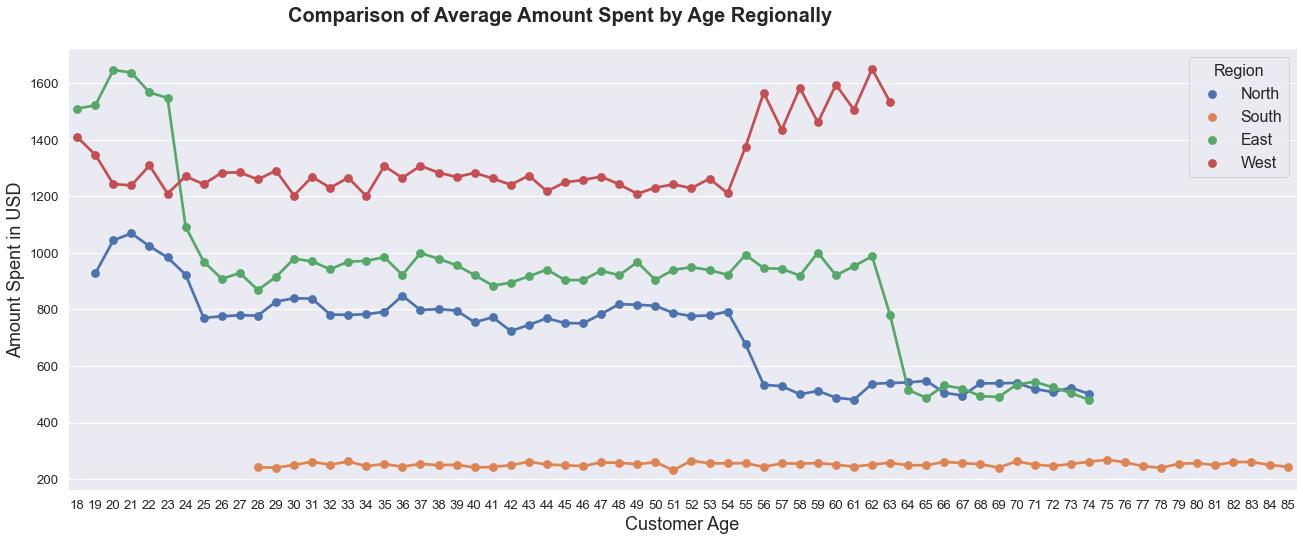

In [62]:
sns.set(font_scale=1.2)
age_amt = sns.catplot(kind='point', x='age', y='amount', data=data, hue='region_name', 
                    hue_order=['North', 'South', 'East', 'West'], legend_out=False, ci=None)

age_amt.set_xlabels('Customer Age', fontsize=18)
age_amt.set_ylabels('Amount Spent in USD', fontsize=18)

plt.suptitle('Comparison of Average Amount Spent by Age Regionally', fontsize=20, fontweight='bold')
plt.legend(title='Region', title_fontsize=16, fontsize=16)
plt.tight_layout(pad=.5)
age_amt.fig.set_figwidth(22)
age_amt.fig.set_figheight(8)

plt.savefig('age_amt_pointplot.png')
plt.show()

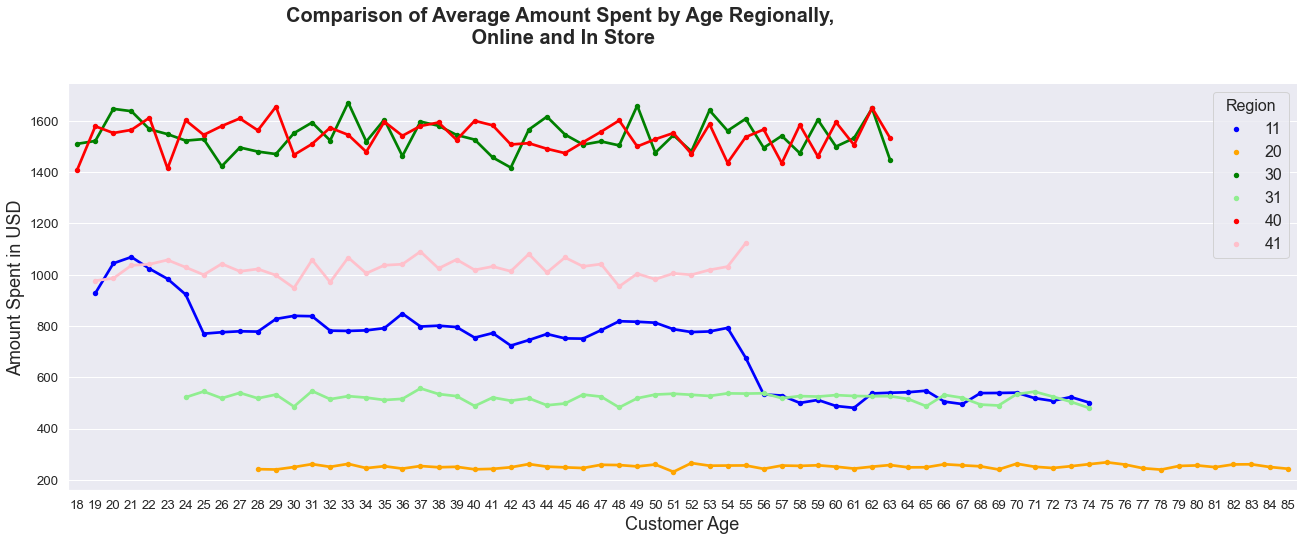

In [63]:
sns.set(font_scale=1.2)
sales_labels = ['North, in store', 'South, online', 'East, online', 'East, in store', 'West, online', 'West, in store']
set_palette = ['Blue', 'Orange', 'Green', 'LightGreen', 'Red','Pink']
age_amt_is = sns.catplot(kind='point', x='age', y='amount', data=dataX, hue='sales', 
                         palette=set_palette, markers='.',
                         legend_out=False, ci=None)

age_amt_is.set_xlabels('Customer Age', fontsize=18)
age_amt_is.set_ylabels('Amount Spent in USD', fontsize=18)

plt.suptitle('Comparison of Average Amount Spent by Age Regionally,\n Online and In Store', fontsize=20, fontweight='bold')
plt.legend(title='Region', title_fontsize=16, fontsize=16)
plt.tight_layout(pad=.5)
age_amt_is.fig.set_figwidth(22)
age_amt_is.fig.set_figheight(8)

plt.show()

In [64]:
dataX['sales_detail'] = dataX['sales']

In [65]:
dataX['sales_detail'].mask(dataX['sales'] == 11, 'North, in store', inplace=True)
dataX['sales_detail'].mask(dataX['sales'] == 20, 'South, online', inplace=True)
dataX['sales_detail'].mask(dataX['sales'] == 30, 'East, online', inplace=True)
dataX['sales_detail'].mask(dataX['sales'] == 31, 'East, in store', inplace=True)
dataX['sales_detail'].mask(dataX['sales'] == 40, 'West, online', inplace=True)
dataX['sales_detail'].mask(dataX['sales'] == 41, 'West, in store', inplace=True)

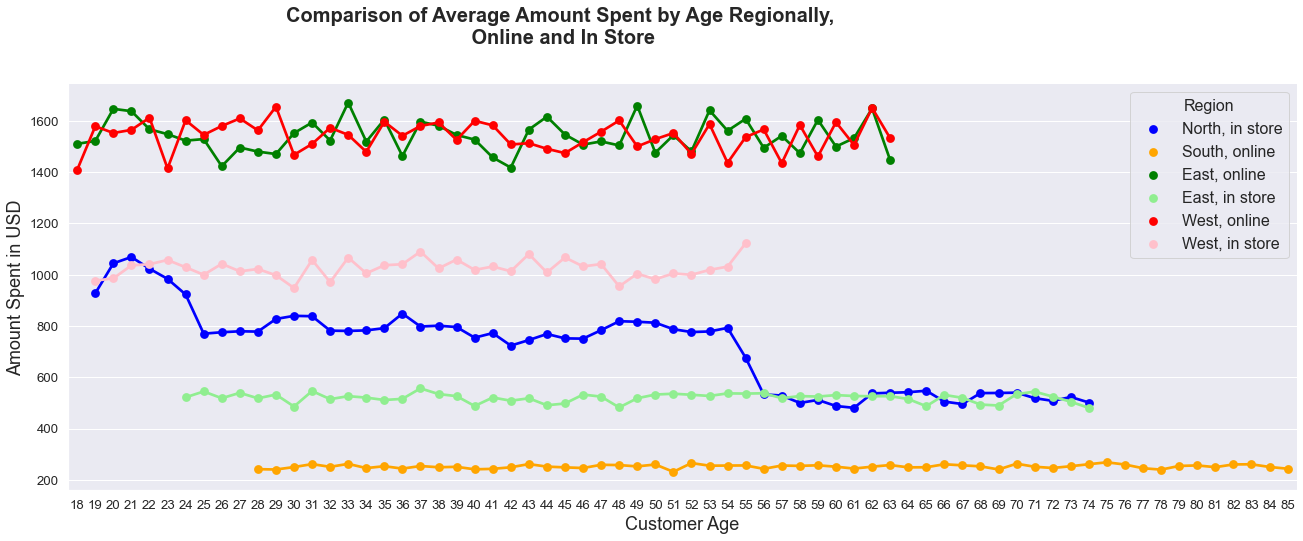

In [66]:
sns.set(font_scale=1.2)
hue_order = ['North, in store', 'South, online', 'East, online', 'East, in store', 'West, online', 'West, in store']
set_palette = ['Blue', 'Orange', 'Green', 'LightGreen', 'Red','Pink']
age_amt_is = sns.catplot(kind='point', x='age', y='amount', data=dataX, hue='sales_detail', hue_order=hue_order,
                         palette=set_palette, legend_out=False, ci=None)

age_amt_is.set_xlabels('Customer Age', fontsize=18)
age_amt_is.set_ylabels('Amount Spent in USD', fontsize=18)

plt.suptitle('Comparison of Average Amount Spent by Age Regionally,\n Online and In Store', fontsize=20, fontweight='bold')
plt.legend(title='Region', title_fontsize=16, fontsize=16)
plt.tight_layout(pad=.5)
age_amt_is.fig.set_figwidth(22)
age_amt_is.fig.set_figheight(8)

plt.savefig('age_amt_is_pointplot.png')
plt.show()

In [67]:
gen_cols = ['generation', 'amount']
df_gen = data[gen_cols]
df_gen.head()

,generation,amount
0,Millenial,281.03
1,Millenial,219.51
2,Gen X,"1,525.70"
3,Gen X,715.25
4,Millenial,"1,937.50"


In [68]:
df_sales.head()

,sales
0,20
1,20
2,41
3,31
4,11


In [69]:
df_gens = pd.concat([df_gen,df_sales], axis=1)
df_gens.head()

,generation,amount,sales
0,Millenial,281.03,20
1,Millenial,219.51,20
2,Gen X,"1,525.70",41
3,Gen X,715.25,31
4,Millenial,"1,937.50",11
